
Distribuição da variável alvo (Heart_Disease):

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64


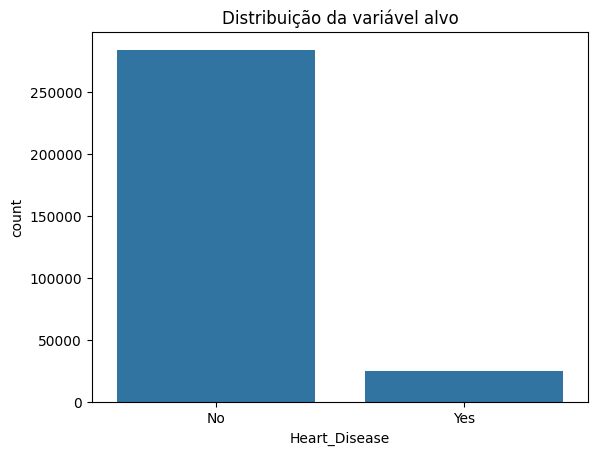


Matriz de Confusão:



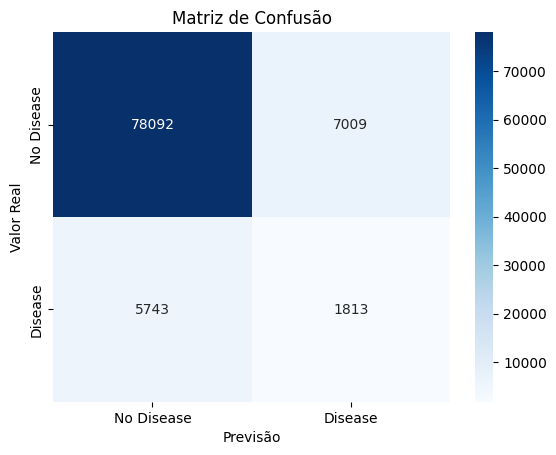


Relatório de Classificação:

              precision    recall  f1-score   support

          No       0.93      0.92      0.92     85101
         Yes       0.21      0.24      0.22      7556

    accuracy                           0.86     92657
   macro avg       0.57      0.58      0.57     92657
weighted avg       0.87      0.86      0.87     92657


Acurácia do Modelo: 0.8623741325533959

Estrutura da Árvore de Decisão:

|--- Diabetes_Yes <= 0.50
|   |--- Age_Category_80+ <= 0.50
|   |   |--- General_Health_Poor <= 0.50
|   |   |   |--- General_Health_Fair <= 0.50
|   |   |   |   |--- Age_Category_75-79 <= 0.50
|   |   |   |   |   |--- Age_Category_70-74 <= 0.50
|   |   |   |   |   |   |--- Age_Category_65-69 <= 0.50
|   |   |   |   |   |   |   |--- Age_Category_60-64 <= 0.50
|   |   |   |   |   |   |   |   |--- Arthritis_Yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- Age_Category_55-59 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Age_Category_50-54 <= 0.50
|   |   

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
file_path = "../CVD_cleaned.csv"  # Caminho do arquivo já carregado no repositório

data = pd.read_csv(file_path)

# Garantir que a coluna 'Heart_Disease' está presente
if 'Heart_Disease' not in data.columns:
    raise KeyError("A coluna 'Heart_Disease' não está presente no dataset.")

# Exploração da variável alvo
print("\nDistribuição da variável alvo (Heart_Disease):\n")
print(data['Heart_Disease'].value_counts())
sns.countplot(x='Heart_Disease', data=data)
plt.title("Distribuição da variável alvo")
plt.show()

# Separação de features e alvo
X = data.drop(columns=['Heart_Disease'])  # Remover a coluna alvo
y = data['Heart_Disease']

# Codificar variáveis categóricas (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do modelo Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Previsões
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("\nMatriz de Confusão:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Matriz de Confusão")
plt.ylabel("Valor Real")
plt.xlabel("Previsão")
plt.show()

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred))

# Visualizar a árvore de decisão
print("\nEstrutura da Árvore de Decisão:\n")
print(export_text(clf, feature_names=list(X.columns)))
